In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-analysis/ecomm_data.csv


In [2]:
#Let's sse what's going on here
df = pd.read_csv("/kaggle/input/ecommerce-customer-analysis/ecomm_data.csv")
df

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41
...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,13.57,36.42,3.75,573.85
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,11.70,37.19,3.58,529.05
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,11.50,38.33,4.96,551.62
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,12.39,36.84,2.34,456.47


In [3]:
df.isnull().sum() #huh, I see no missing values, nice:)

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
df.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
#I wonder what the average is on each numeric variable?

df2 = df[['Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

df2.mean()


Time on App              12.05262
Time on Website          37.06048
Length of Membership      3.53336
Yearly Amount Spent     499.31424
dtype: float64

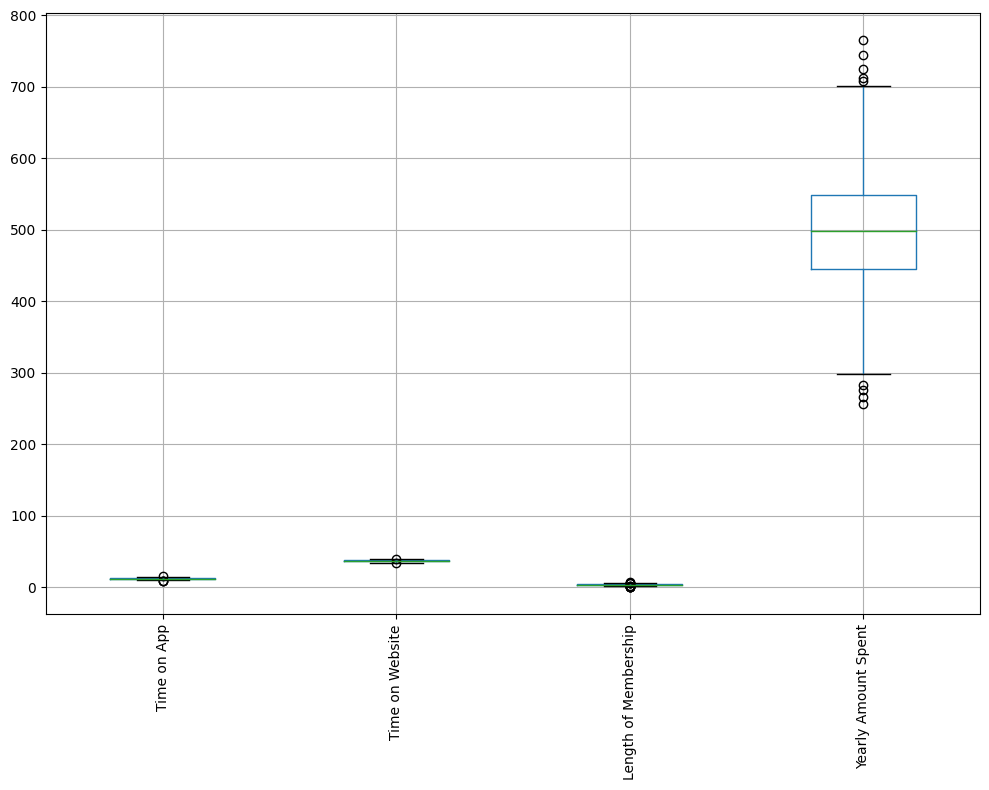

In [6]:
#Let's see what the whiskerbox looks like

df2.boxplot(figsize=(10,8))
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

#Given the outliers on the plot, these variables are normally distributed, shall we perhaps see this in a histogram

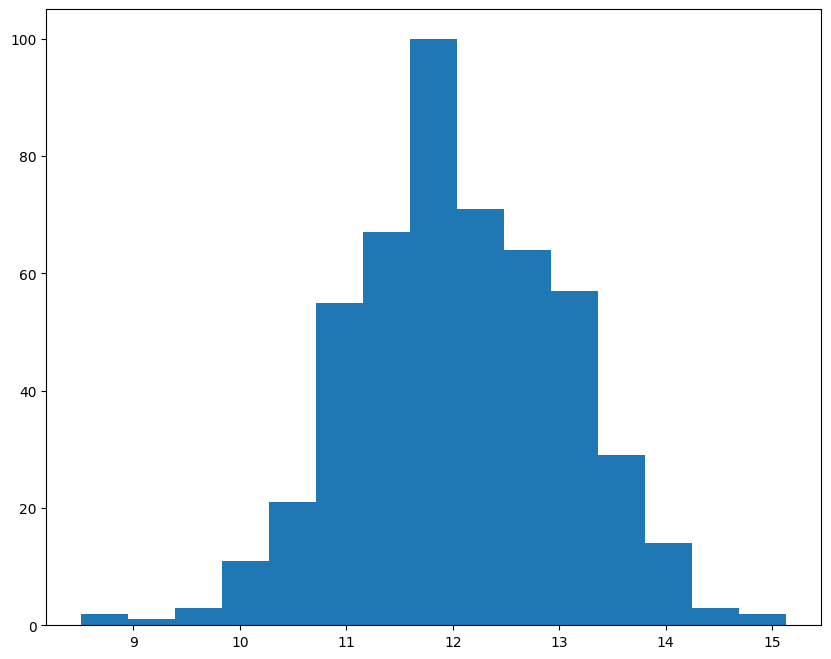

In [7]:
plt.figure(figsize=(10,8))
plt.hist(df2['Time on App'],bins=15)
plt.tight_layout
plt.show()

In [8]:
#Since these numeric variables are normaly spread, it would make sense to find out how their confidence intervals are shaped.

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [9]:
for p in [0.85,0.90,0.95]:
    m1,h1 = mean_confidence_interval(df2['Time on App'],p)
    m2,h2 = mean_confidence_interval(df2['Time on Website'],p)
    print(f'Conf={p:.2f} Time on App: {m1-h1:.2f}...{m1+h1:.2f}, Time on Website: {m2-h2:.2f}...{m2+h2:.2f}')

Conf=0.85 Time on App: 11.99...12.12, Time on Website: 37.00...37.13
Conf=0.90 Time on App: 11.98...12.13, Time on Website: 36.99...37.13
Conf=0.95 Time on App: 11.97...12.14, Time on Website: 36.97...37.15


In [10]:
#The above confidences for both Time on App and Time on Website seem withing range, 
#however Time on Website proves to be higher than Time on App.

In [11]:
#To boost our confidence about the above findings, let us use Student t-test, a more statistically correct method of proving the above
tval, pval = ttest_ind(df2['Time on App'], df2['Time on Website'], equal_var=False)
print(f"T-value = {tval:.2f}\nP-value = {pval}")

T-value = -394.42
P-value = 0.0


In [12]:
#The above P-value shows the probability of how these two distributions have the same mean, in this case is a 0% probability
# T-value as an intermediate value of normalized distribution mean difference used in t-test

In [13]:
#Now we need to know which platform time spent brings more revenue, 
#to do this I am going to work out which platform time correlates with Yearly Amount Spent better?

In [14]:
#Time on App,Yearly Amount Spent correlation?
#We are first going to see how changes in two variabes impact on each other by calculating the covaraince
print(f"Covariane matrix:\n{np.cov(df['Time on App'], df2['Yearly Amount Spent'])}")
print(f"Covariance = {np.cov(df['Time on App'], df2['Yearly Amount Spent'])[0,1]}")

Covariane matrix:
[[9.88867070e-01 3.93820113e+01]
 [3.93820113e+01 6.29083179e+03]]
Covariance = 39.38201131382765


In [15]:
#There seem to be a positive covariance between the two variables
#Now let us see what the correlation is
print(f"Correlation = {np.corrcoef(df2['Time on App'], df2['Yearly Amount Spent'])[0,1]}")


Correlation = 0.4993153288793684


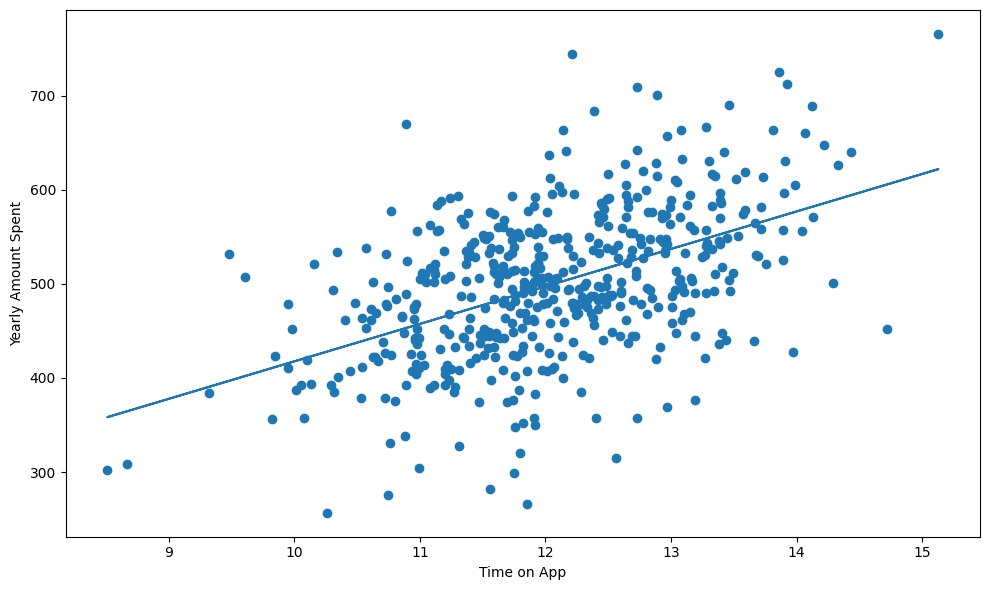

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df2['Time on App'],df2['Yearly Amount Spent'])
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
m, b = np.polyfit(df2['Time on App'], df2['Yearly Amount Spent'], 1)
plt.plot(df2['Time on App'], m*df2['Time on App']+b)
plt.tight_layout()
plt.show()

In [17]:
#Time on Website,Yearly Amount Spent?

In [18]:
print(f"Covariane matrix:\n{np.cov(df2['Time on Website'], df2['Yearly Amount Spent'])}")
print(f"Covariance = {np.cov(df['Time on Website'], df2['Yearly Amount Spent'])[0,1]}")

Covariane matrix:
[[ 1.02122221e+00 -2.08505446e-01]
 [-2.08505446e-01  6.29083179e+03]]
Covariance = -0.20850544609218646


In [19]:
#Now let us see what the correlation is
print(f"Correlation = {np.corrcoef(df2['Time on Website'], df2['Yearly Amount Spent'])[0,1]}")


Correlation = -0.0026013766652847165


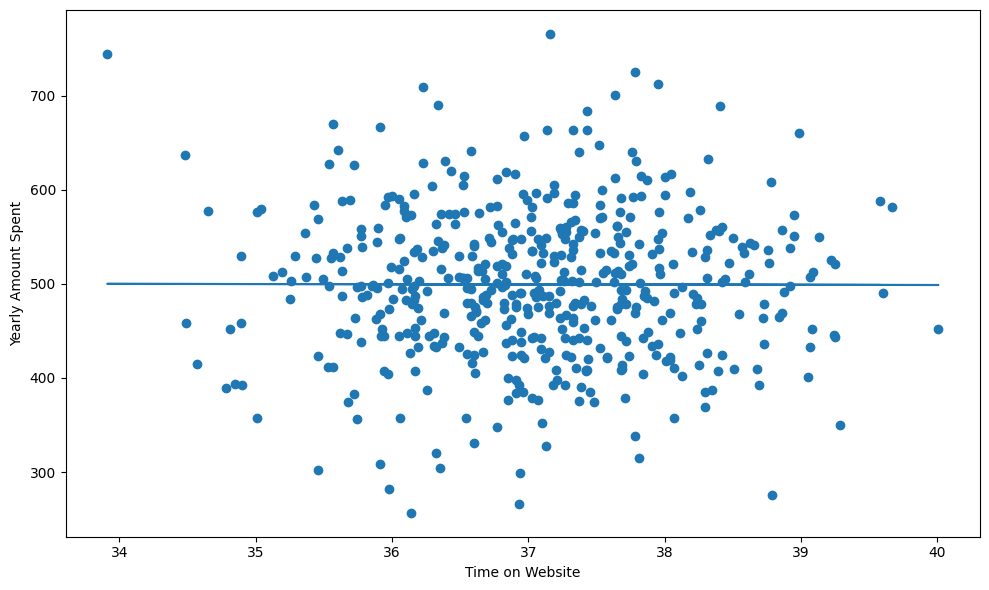

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df2['Time on Website'],df2['Yearly Amount Spent'])
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
m, b = np.polyfit(df2['Time on Website'], df2['Yearly Amount Spent'], 1)
plt.plot(df2['Time on Website'], m*df2['Time on Website']+b)
plt.tight_layout()
plt.show()

In [21]:
#It appears that, while people spent longer time on the website, they could predominently be there to browse around and not so confident to spent money on there.
#App seems to have less time spent on it while it has a positive correlation with the Yearly Amount Spent, customers on the App seems to be more trusting and feel compeled to spend their money.
#The app should be ore invested in to increase time spent thus increasing revenue


In [22]:
#Before we go, how impactful is Length of Membership on Time on App, Time on Website, and Yearly Spent Amount?

print(f"Covariane matrix:\n{np.cov(df2['Length of Membership'], df2['Time on App'])}")
print(f"Covariance = {np.cov(df2['Length of Membership'], df2['Time on App'])[0,1]}")
print(f"Correlation = {np.corrcoef(df2['Length of Membership'], df2['Time on App'])[0,1]}")

Covariane matrix:
[[0.99852135 0.02905551]
 [0.02905551 0.98886707]]
Covariance = 0.029055507815631265
Correlation = 0.029240233376763267


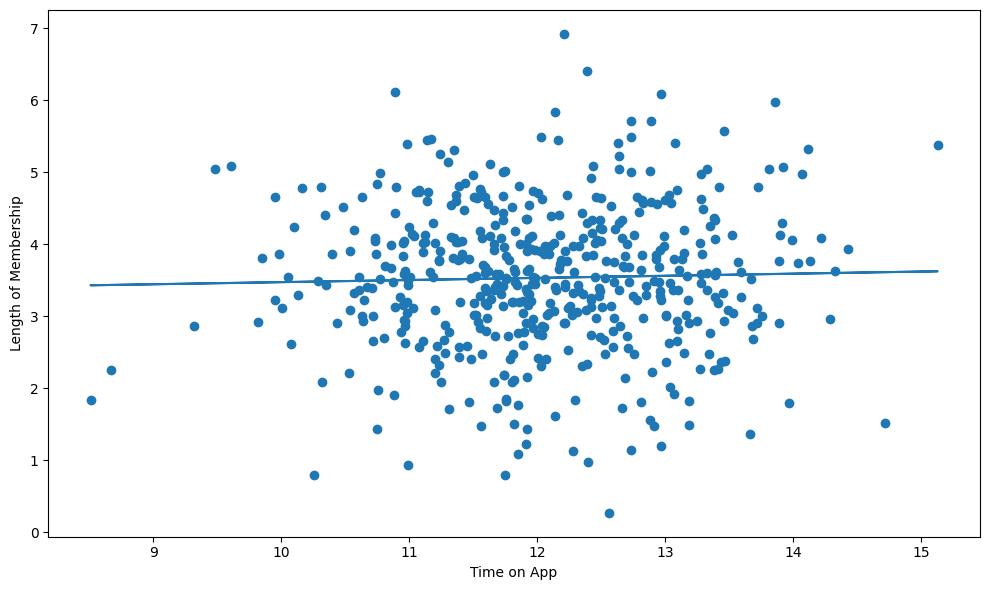

In [23]:
plt.figure(figsize = (10,6))
plt.scatter(df2['Time on App'],df2['Length of Membership'])
plt.xlabel('Time on App')
plt.ylabel('Length of Membership')
m, b = np.polyfit(df2['Time on App'], df2['Length of Membership'], 1)
plt.plot(df2['Time on App'], m*df2['Time on App']+b)
plt.tight_layout()
plt.show()

In [24]:
#Length of Membership vs Time on Website
print(f"Covariane matrix:\n{np.cov(df2['Length of Membership'], df2['Time on Website'])}")
print(f"Covariance = {np.cov(df2['Length of Membership'], df2['Time on Website'])[0,1]}")
print(f"Correlation = {np.corrcoef(df2['Length of Membership'], df2['Time on Website'])[0,1]}")


Covariane matrix:
[[ 0.99852135 -0.04790843]
 [-0.04790843  1.02122221]]
Covariance = -0.04790842965931862
Correlation = -0.04744310788947982


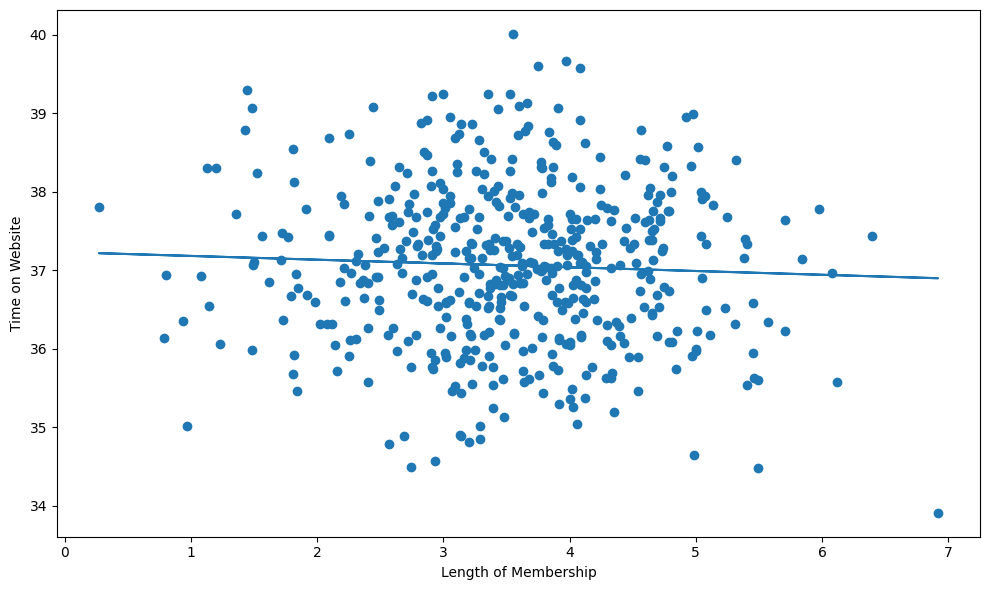

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(df2['Length of Membership'],df2['Time on Website'],)
plt.xlabel('Length of Membership')
plt.ylabel('Time on Website')
m, b = np.polyfit(df2['Length of Membership'], df2['Time on Website'], 1)
plt.plot(df2['Length of Membership'], m*df2['Length of Membership']+b)
plt.tight_layout()
plt.show()

In [26]:
#Length of Membership vs Yearly Amount Spent
print(f"Covariane matrix:\n{np.cov(df2['Length of Membership'], df2['Yearly Amount Spent'])}")
print(f"Covariance = {np.cov(df2['Length of Membership'], df2['Yearly Amount Spent'])[0,1]}")
print(f"Correlation = {np.corrcoef(df2['Length of Membership'], df2['Yearly Amount Spent'])[0,1]}")

Covariane matrix:
[[9.98521353e-01 6.41327613e+01]
 [6.41327613e+01 6.29083179e+03]]
Covariance = 64.1327612761523
Correlation = 0.8091838839698419


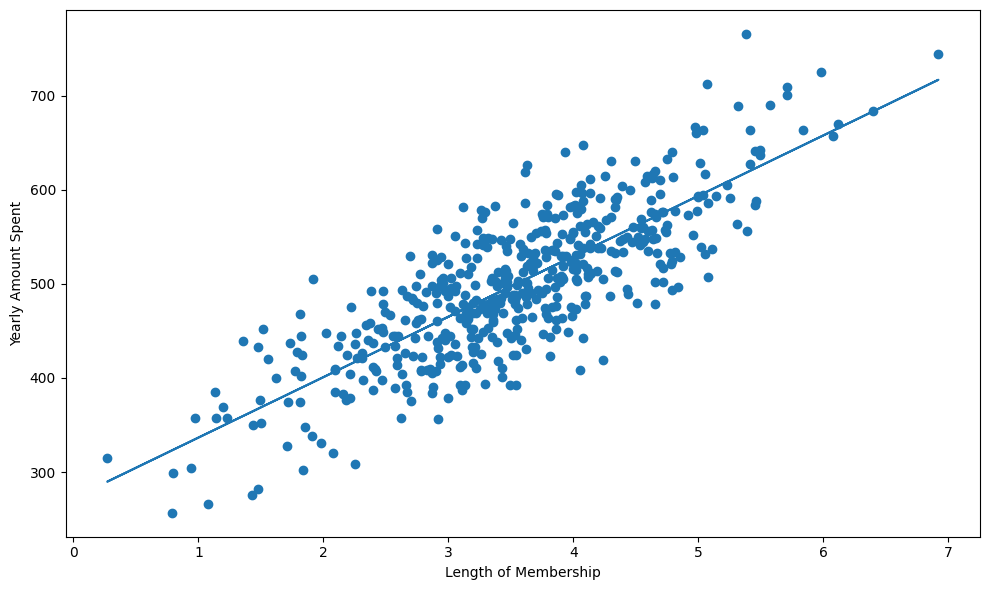

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(df2['Length of Membership'],df2['Yearly Amount Spent'])
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
m, b = np.polyfit(df2['Length of Membership'], df2['Yearly Amount Spent'], 1)
plt.plot(df2['Length of Membership'], m*df2['Length of Membership']+b)
plt.tight_layout()
plt.show()

In [28]:
#Now that we have explored and identified the strong relationships amongst the variables,
#let us create a linear regression model that will predict the yearly amount spent


In [29]:
#Data Splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df2['Length of Membership'],df2['Yearly Amount Spent'], test_size=0.25 )

In [30]:
#Linear Regression Model

In [31]:
# Create a linear regression model
model = LinearRegression()

In [32]:
# Fit the model to the training data
x_train = np.array(x_train).reshape(-1,1)#reshaping predictor to a 2D array for sklearn
model.fit(x_train,y_train)


LinearRegression()

In [33]:
#Predictions on the test data
x_test = np.array(x_test).reshape(-1,1)
y_pred = model.predict(x_test)
y_pred

array([349.95744945, 572.00195545, 417.98264493, 496.91754157,
       446.21951852, 474.45639212, 494.35055306, 432.10108173,
       505.26025423, 516.81170252, 473.81464499, 396.1632426 ,
       495.63404732, 346.10696668, 562.37574855, 370.49335752,
       573.92719684, 548.89905888, 507.18549561, 446.86126565,
       575.21069109, 523.22917379, 527.72140368, 534.78062208,
       514.24471401, 432.10108173, 503.33501284, 421.19138056,
       520.02043815, 487.93308179, 395.52149548, 445.5777714 ,
       426.96710471, 477.02338063, 367.92636901, 542.4815876 ,
       568.15147269, 500.12627721, 443.01078289, 572.00195545,
       537.98935771, 483.4408519 , 542.4815876 , 553.39128877,
       567.50972556, 491.14181743, 457.12921969, 506.54374848,
       630.40094403, 492.42531168, 516.81170252, 580.34466811,
       407.07294377, 529.64664506, 427.60885184, 490.5000703 ,
       474.45639212, 493.06705881, 514.24471401, 489.21657605,
       455.20397831, 482.79910477, 491.14181743, 407.07

In [34]:
#calculate the r_squared score
r2 = r2_score(y_test,y_pred)
r2

0.6451466233828969

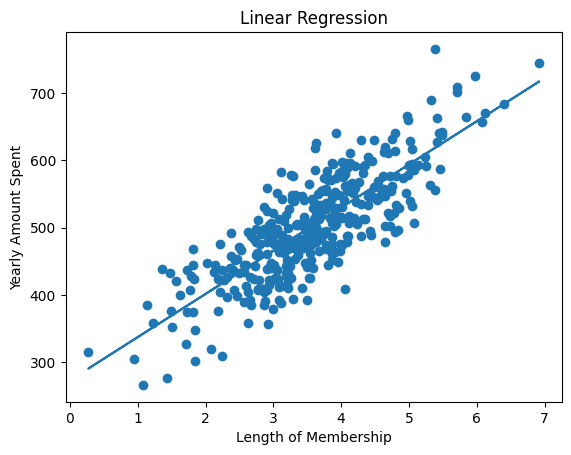

In [35]:
# Plot the data and the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train))
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Linear Regression')
plt.show()